In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Data Preparation

In [83]:
df = pd.read_csv("Homework8.csv")
df.head()

,Unnamed: 0,merchant,time,amount_usd_in_cents
0,1,faa029c6b0,2034-06-17 23:34:14,6349
1,2,ed7a7d91aa,2034-12-27 00:40:38,3854
2,3,5608f200cf,2034-04-30 01:29:42,789
3,4,15b1a0d61e,2034-09-16 01:06:23,4452
4,5,4770051790,2034-07-22 16:21:42,20203


In [84]:
# Let's drop de Unnamed:0 column
df.drop("Unnamed: 0", axis=1, inplace=True)
# Filter the data for the specified date range

df['time'] = pd.to_datetime(df['time'])

df.head()

,merchant,time,amount_usd_in_cents
0,faa029c6b0,2034-06-17 23:34:14,6349
1,ed7a7d91aa,2034-12-27 00:40:38,3854
2,5608f200cf,2034-04-30 01:29:42,789
3,15b1a0d61e,2034-09-16 01:06:23,4452
4,4770051790,2034-07-22 16:21:42,20203


In [85]:
# Filter transactions just to be between 2033,01,01 to 2035,01,01
start_date = '2033-01-01'
end_date = '2035-01-01'

# Filter the dataframe
df = df[(df['time'] >= start_date) & (df['time'] < end_date)]
df.head()

,merchant,time,amount_usd_in_cents
0,faa029c6b0,2034-06-17 23:34:14,6349
1,ed7a7d91aa,2034-12-27 00:40:38,3854
2,5608f200cf,2034-04-30 01:29:42,789
3,15b1a0d61e,2034-09-16 01:06:23,4452
4,4770051790,2034-07-22 16:21:42,20203


In [86]:
# Let's Make the 'time' column the index of the DataFrame
df.set_index('time', inplace=True)

df.head()

,merchant,amount_usd_in_cents
time,,
2034-06-17 23:34:14,faa029c6b0,6349
2034-12-27 00:40:38,ed7a7d91aa,3854
2034-04-30 01:29:42,5608f200cf,789
2034-09-16 01:06:23,15b1a0d61e,4452
2034-07-22 16:21:42,4770051790,20203


In [87]:
df.groupby('merchant').count()

,amount_usd_in_cents
merchant,
0002b63b92,1
0002d07bba,4
00057d4302,28
000bcff341,1
000ddbf0ca,1
...,...
ffd3e45675,5
ffe1f6b51a,53
ffe26b900d,81


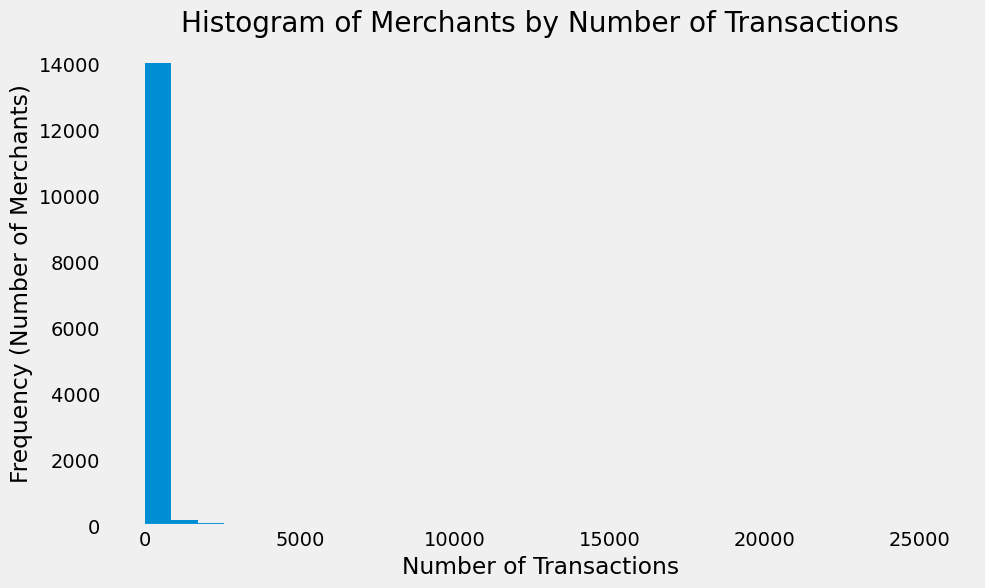

In [88]:
import matplotlib.pyplot as plt

# Count the number of transactions per merchant
merchant_counts = df['merchant'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
merchant_counts.hist(bins=30)  # You can adjust the number of bins for better visualization
plt.title('Histogram of Merchants by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency (Number of Merchants)')
plt.grid(False)  # Turn off the grid for better appearance
plt.show()

In [89]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,amount_usd_in_cents
count,1513719.00
mean,15484.66
std,61618.86
min,201.00
25%,3215.00
50%,6104.00
75%,12606.00
max,25920280.00


In [90]:
# Convert amount from cents to dollars
df['amount_usd'] = df['amount_usd_in_cents'] / 100

# Resample the data to get daily sums
daily_sums = df.resample('D')['amount_usd'].sum()

print(daily_sums.head(20))


time
2033-01-01      4415.40
2033-01-02      4758.62
2033-01-03      6283.53
2033-01-04      4851.11
2033-01-05     10016.21
2033-01-06     11055.98
2033-01-07     92925.77
2033-01-08     10977.77
2033-01-09      9100.92
2033-01-10     20481.44
2033-01-11    241898.77
2033-01-12   1210293.14
2033-01-13     34005.18
2033-01-14     41119.03
2033-01-15     15817.95
2033-01-16     11087.61
2033-01-17     18953.62
2033-01-18     19194.69
2033-01-19     32943.04
2033-01-20     18733.76
Freq: D, Name: amount_usd, dtype: float64


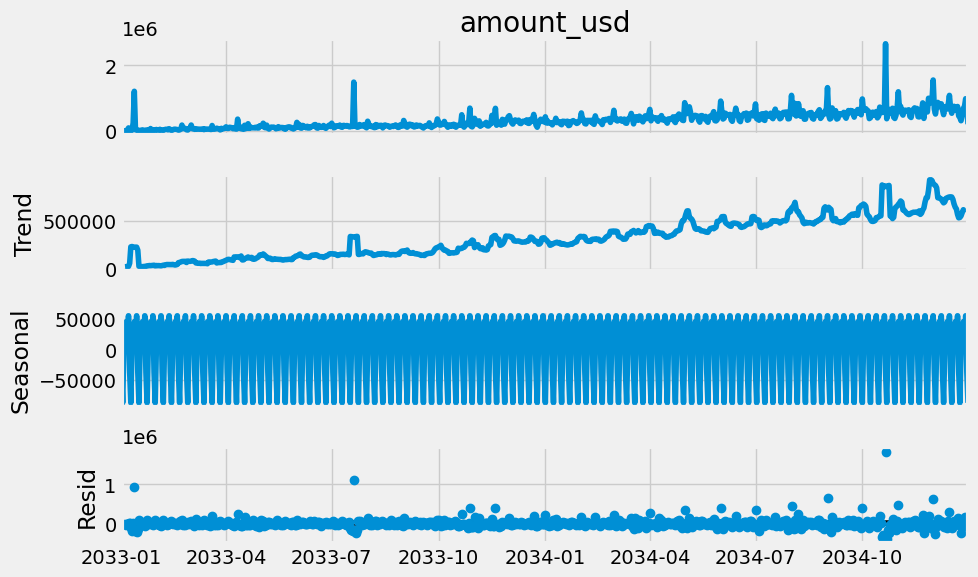

In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

decomposition = sm.tsa.seasonal_decompose(daily_sums, model='additive')
fig = decomposition.plot()
plt.show()

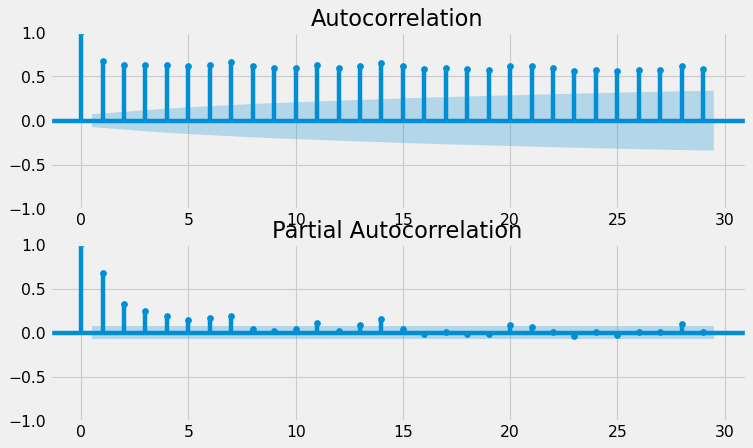

In [92]:
figure(figsize=(10, 6), dpi=80)
plt.subplot(211)
plot_acf(daily_sums, ax=plt.gca())
plt.subplot(212)
plot_pacf(daily_sums,method='ywm', ax=plt.gca())
plt.show()

# Forecasting Methods

In [93]:
## Apply Holt-Winters method to capture seasonality, trend, and level in the daily transaction data.

In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 7 for weekly seasonality in daily data, 12 for monthly seasonality in monthly data, etc.
hw_model = ExponentialSmoothing(daily_sums, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast future values 
forecast = hw_model.forecast(180) #This is to forecasdt 180 days

print(forecast)


2035-01-01   777920.89
2035-01-02   683576.81
2035-01-03   696064.36
2035-01-04   678108.40
2035-01-05   679213.33
                ...   
2035-06-25   864692.44
2035-06-26   877150.80
2035-06-27   849371.02
2035-06-28   881970.02
2035-06-29   868335.60
Freq: D, Length: 180, dtype: float64


D:\ComputerCode\JF_Environments\deep2-env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


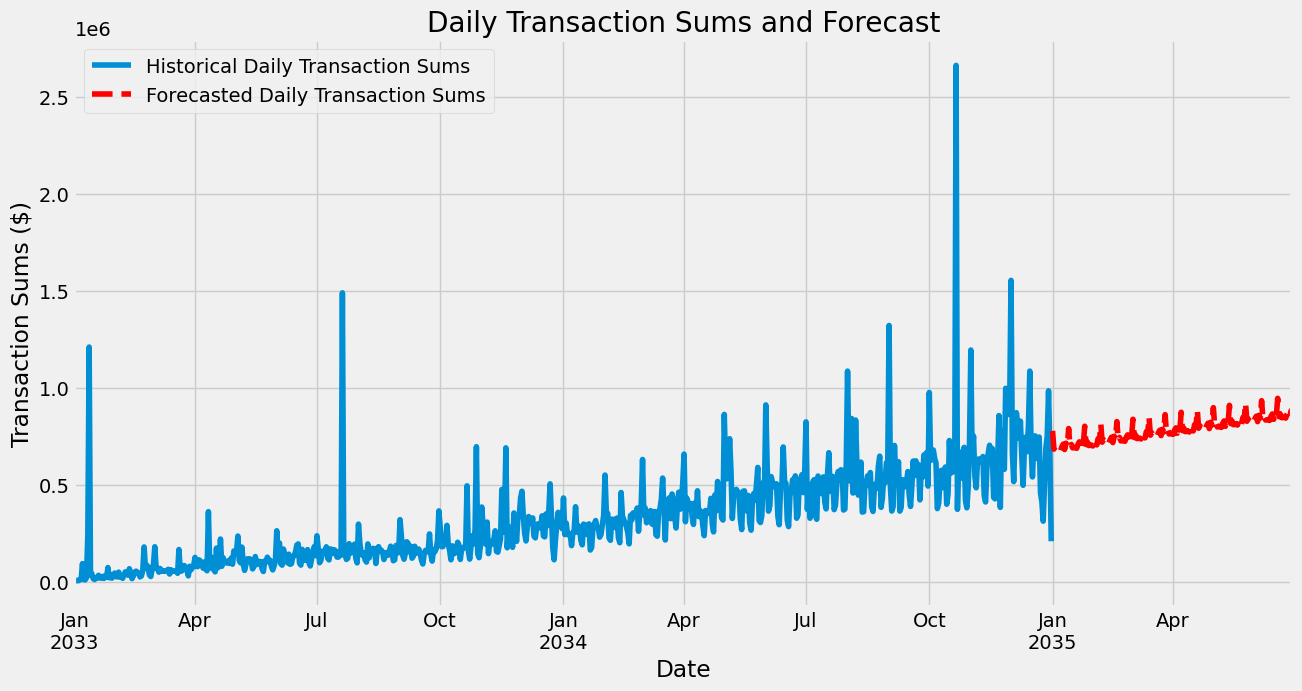

In [95]:
# Plot historical data
plt.figure(figsize=(14, 7))
daily_sums.plot(label='Historical Daily Transaction Sums')

# Plot forecasted data
forecast.plot(style='--', label='Forecasted Daily Transaction Sums', color='red')

# Adding titles and labels
plt.title('Daily Transaction Sums and Forecast')
plt.xlabel('Date')
plt.ylabel('Transaction Sums ($)')
plt.legend()
plt.show()


# Forecasting Models

## Prophet

In [96]:
from prophet import Prophet


# Reset index to get datetime into a column
daily_sums_prophet = daily_sums.reset_index()

# Rename columns for Prophet compatibility
daily_sums_prophet.columns = ['ds', 'y']


# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(daily_sums_prophet)

# Create a DataFrame to hold predictions
future = model_prophet.make_future_dataframe(periods=180)  
forecast_prophet = model_prophet.predict(future)

22:12:05 - cmdstanpy - INFO - Chain [1] start processing
22:12:05 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
# Create lagged features, lag of 1 day, 2 days, and 7 days
for lag in [1, 2, 7]:
    daily_sums[f'lag_{lag}'] = daily_sums.shift(lag)


## Train Linear regression and Random Forest


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error


# Reset index to get datetime into a column
daily_sums2 = daily_sums.reset_index()

# Rename columns for compatibility
daily_sums2.columns = ['day', 'amount_usd']


# Ensure 'day' column is datetime
daily_sums2['day'] = pd.to_datetime(daily_sums2['day'], errors='coerce')

# Rename columns
daily_sums2.columns = ['day', 'amount_usd']

# Let's drop all NA's since we used lags
daily_sums2 = daily_sums2.dropna()

# Extract datetime features
daily_sums2['year'] = daily_sums2['day'].dt.year
daily_sums2['month'] = daily_sums2['day'].dt.month
daily_sums2['day_of_month'] = daily_sums2['day'].dt.day
daily_sums2['day_of_week'] = daily_sums2['day'].dt.dayofweek  # Monday=0, Sunday=6

# let's drop the original 'day' column as it's non-numeric
X = daily_sums2.drop(['day', 'amount_usd'], axis=1)
y = daily_sums2['amount_usd']

# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor()

# Placeholder for MAPE scores
mape_scores = {'Linear Regression': [], 'Random Forest': []}

# Perform cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit and predict with Linear Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_mape = mean_absolute_percentage_error(y_test, lr_pred)
    mape_scores['Linear Regression'].append(lr_mape)
    
    # Fit and predict with Random Forest
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_mape = mean_absolute_percentage_error(y_test, rf_pred)
    mape_scores['Random Forest'].append(rf_mape)

# Calculating average MAPE scores
avg_mape_scores = {model: np.mean(scores) for model, scores in mape_scores.items()}

# Display average MAPE scores
for model, mape_score in avg_mape_scores.items():
    print(f"{model}: Average MAPE = {mape_score:.4f}")


Linear Regression: Average MAPE = 0.2152
Random Forest: Average MAPE = 0.2479


Text(0.5, 1.0, 'Prophet Forecast and Confidence Intervals')

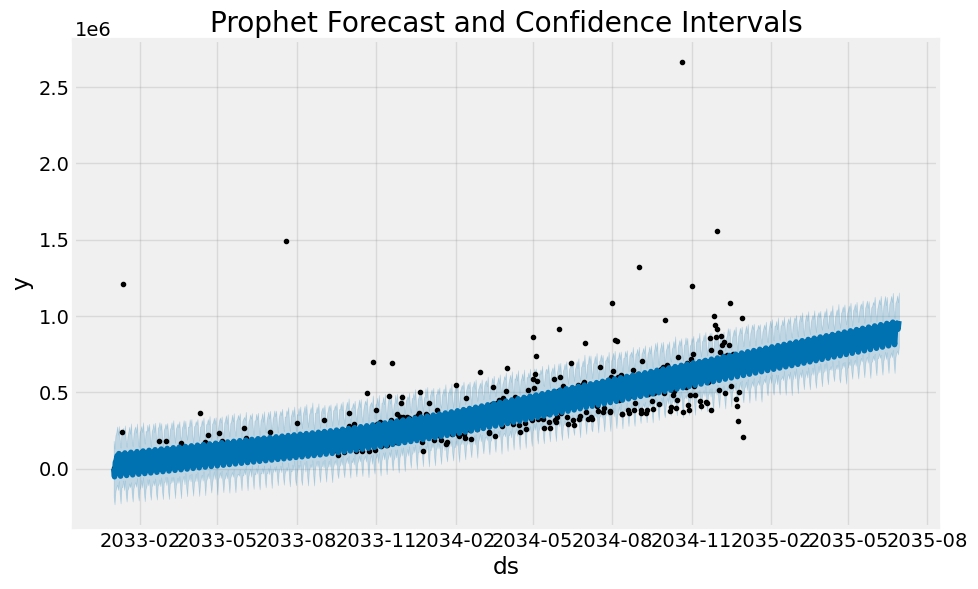

In [99]:
fig1 = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast and Confidence Intervals')


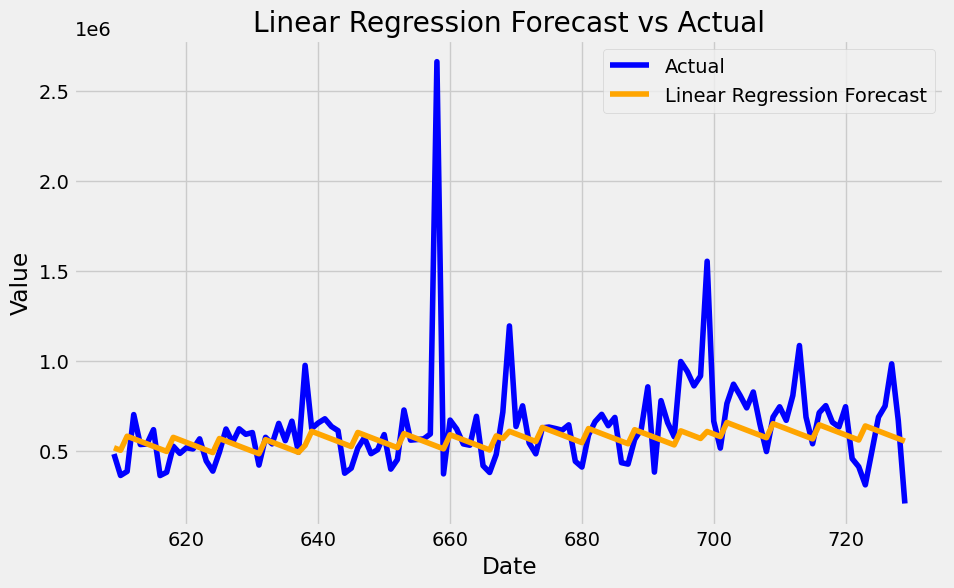

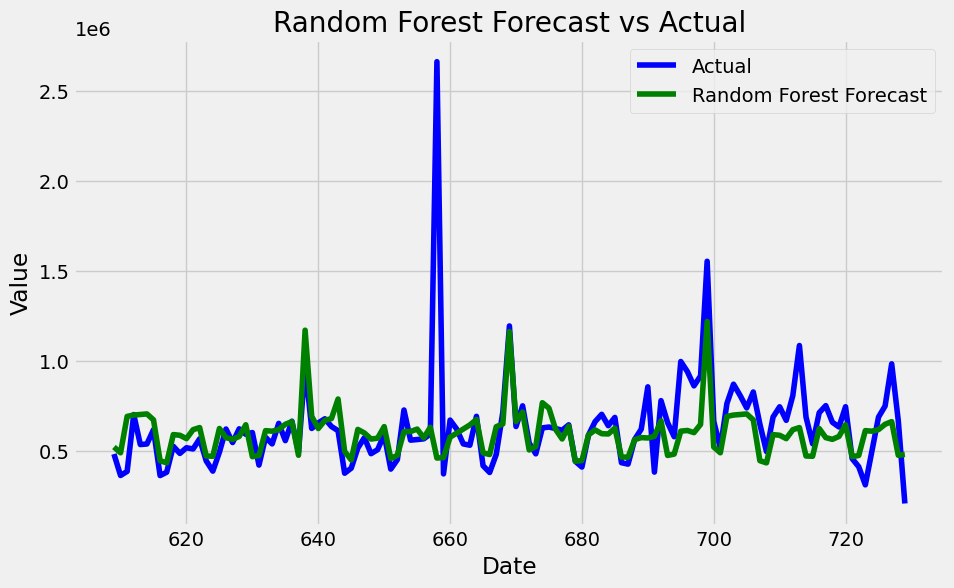

In [100]:

# Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, lr_pred, label='Linear Regression Forecast', color='orange')
plt.title('Linear Regression Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Random Forest Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, rf_pred, label='Random Forest Forecast', color='green')
plt.title('Random Forest Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


General Conclusions:

By looking at the plots of the forecast values, it would seem to me that PROPHET and Linear regresion seem that capture the general trend of the data.  I was expecting it from the linear model, but was surprised that Prophet would not capture the nuances of the fluctuations of the data which seem to be periodic.  This may be more likely due to my part not completely understanding how to setup Prophet.

The RANDOM FOREST model does seem to attempt to reflect periodic variations.
